### Описание проекта

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

### Часть 1. Приоритизация гипотез.

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from datetime import datetime, timedelta
import datetime as dt
import seaborn as sns
import scipy.stats as stats
import os
sns.set(rc={'figure.figsize':(15,11)}) #Зададим размер фигур построеных с помощью seaborn
pd.options.display.max_colwidth = 210 #Увеливичим максимальую ширину отображаемого столбца
sns.set_palette('dark')

In [3]:
pth1 = 'hypothesis.csv'
pth2 = '/datasets/hypothesis.csv'

if os.path.exists(pth1):
    hypotes = pd.read_csv(pth1)
elif os.path.exists(pth2):
    hypotes = pd.read_csv(pth2)
else:
    print('Что-то пошло не так')

Изучим данные

In [4]:
display(hypotes)
hypotes.info()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Никаких проблем с данными мы не видим, типы в порядке, однако стоит переименовать стобцы для удобства приоритизации

In [5]:
hypotes = hypotes.rename(columns=
               {'Hypothesis':'hypothesis',
                'Reach':'reach',
                'Impact':'impact',
                'Confidence':'confidence',
                'Efforts':'efforts'
                }) # Переименуем столбцы

#### Приоритизируем гипотезы по методу ICE

In [6]:
hypotes['ice'] = (hypotes['impact'] * hypotes['confidence']) / hypotes['efforts'] #Расчитаем ICE
display(hypotes[['hypothesis','ice']].sort_values('ice',ascending=False))

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Мы можем сделать вывод, что наиболее приоритетные гипотезы это 8, 0 и 7

#### Приоритизируем гипотезы по методу RICE

In [7]:
hypotes['RICE'] = (hypotes['reach'] * hypotes['impact'] * hypotes['confidence']) / hypotes['efforts'] #Расчитаем RICE
display(hypotes[['hypothesis','RICE']].sort_values('RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Мы можем сделать вывод, что наиболее приоритетные гипотезы это 7, 2 и 0 или 6


In [8]:
display(hypotes[['hypothesis','RICE','ice']].sort_values(by=['RICE','ice'], ascending=False))

,hypothesis,RICE,ice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0,11.200000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0,7.000000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0,13.333333
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0,8.000000
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2,16.200000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0,1.125000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0,1.333333
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0,1.000000


#### Вывод

Метод RICE является модифицированной версией ICE, в котором есть показатель охвата. Исходя из этого, мы должны выбрать 7 гипотезу как приоритетную, так как она затронет наибольшее число пользователей. 


### Часть 2. Анализ A/B-теста

Мы провели A/B тест и можем приступить к его анализу. Для начала откроем и изучим файлы



In [11]:
pth1_1 = 'orders.csv'
pth1_2 = 'visitors.csv'
pth2_1 = '/datasets/orders.csv'
pth2_2 = '/datasets/visitors.csv'
    
if os.path.exists(pth1_1):
    orders = pd.read_csv(pth1_1)
    visitors = pd.read_csv(pth1_2)
elif os.path.exists(pth2_1):
    orders = pd.read_csv(pth2_1)
    visitors = pd.read_csv(pth2_2)
else:
    print('Что-то пошло не так')

In [12]:
display(orders)
orders.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Пропусков нет, типы верные. 
Проверим два момента:
1. Что если есть пользователь который попал в группу А и в группу В?
2. Проверим на полные дубликаты

In [13]:
print('Число элементов до удаления дубликатов:',len(orders))
orders = orders.drop_duplicates().reset_index(drop=True) #Удалим дубликаты
print('Число элементов после удаления дубликатов:',len(orders))

Число элементов до удаления дубликатов: 1197
Число элементов после удаления дубликатов: 1197


In [14]:
gr_a = orders[orders['group'] == 'A']['visitorId'].reset_index(drop=True) #Создадим отдельную таблицу со всеми пользователями А
gr_b = orders[orders['group'] == 'B']['visitorId'].reset_index(drop=True) #Создадим отдельную таблицу со всеми пользователями В
gr_c = gr_a[gr_a.isin(gr_b)] #Создадим отдельную таблицу с пересечениями двух групп
print('Число пользователей попавших в обе группы =',len(gr_c))

orders[orders['visitorId'].isin(gr_c)] = np.nan #Заменим пользователей на nan
orders = orders.dropna() #Удалим nan
gr_a = orders[orders['group'] == 'A']['visitorId'].reset_index(drop=True).unique()
gr_b = orders[orders['group'] == 'B']['visitorId'].reset_index(drop=True).unique()
print('Размер группы A:', len(gr_a))
print('Размер группы B:', len(gr_b))

Число пользователей попавших в обе группы = 89
Размер группы A: 445
Размер группы B: 528


Полных дубликатов строк не обнаружено, пользователи попавшие в обе группы удалены

Теперь проверим таблицу `visitors`

Так првоерим ее на явные дубликаты

In [15]:
display(visitors)
visitors.info()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [16]:
print('Число элементов до удаления дубликатов:',len(visitors))
visitors = visitors.drop_duplicates().reset_index(drop=True) #Удалим дубликаты
print('Число элементов после удаления дубликатов:',len(visitors))

Число элементов до удаления дубликатов: 62
Число элементов после удаления дубликатов: 62


Полных дубликатов и пропусков нет, данные готовы к работе

#### Вывод
Мы обработали данные и подготовили их к работе

#### Построим график кумулятивной выручки по группам

In [17]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
    

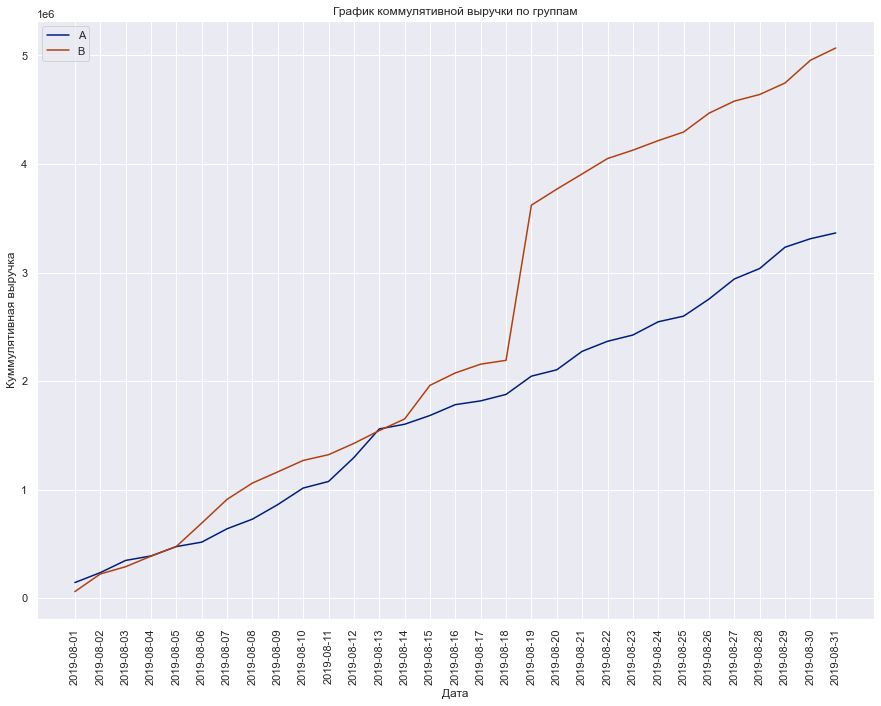

In [18]:
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xlabel('Дата')
plt.ylabel('Куммулятивная выручка')
plt.title('График коммулятивной выручки по группам')
plt.xticks(rotation = 90)
plt.legend() 
plt.show()

#### Вывод

Выручка увеличивается в течении всего теста. 
В группе В на 2019-08-18 произошел резкий рост выручки, что свидетельствует о том, что в эту группу попал крупный заказ, стоит удалить аномалии в дальнейшем.
Выручка по группе В  немного выше чем выручка по группе А.

#### Построим график кумулятивного среднего чека по группам.

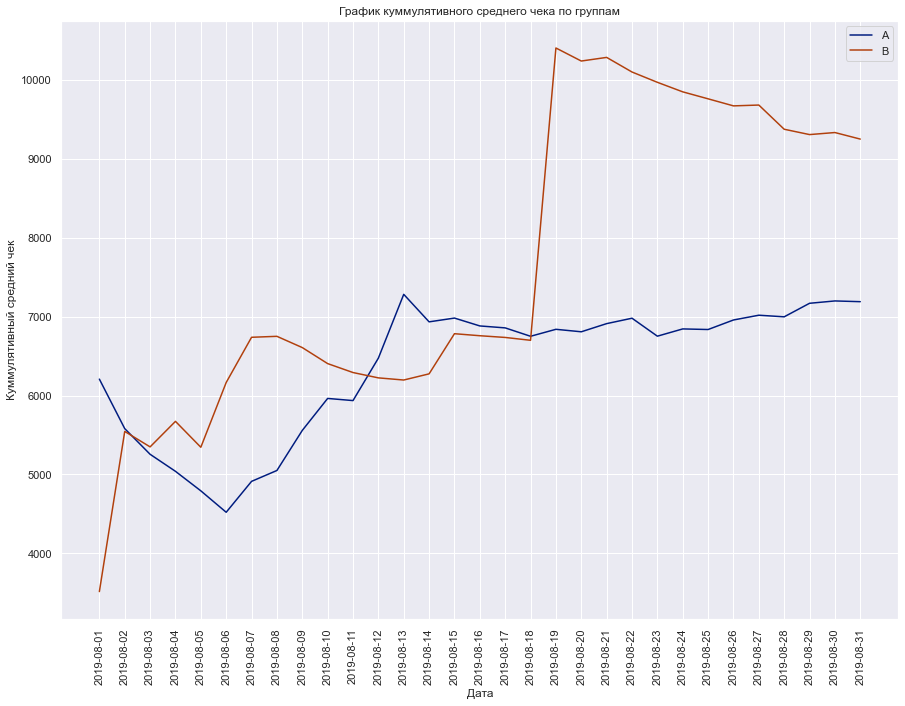

In [19]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xlabel('Дата')
plt.ylabel('Куммулятивный средний чек')
plt.title('График куммулятивного среднего чека по группам')
plt.xticks(rotation = 90)
plt.legend() 
plt.show()

#### Вывод

Как мы видим 2019-08-18 произошел резкий скачек среднего чека в группе B, что так же подтверждает попадание крупного заказа в эту группу. При этом мы можем видеть, что средний чек в группе A большую часть времени был стабилен, кроме начала теста, однако мы не можем сделать вывод по данной метрике из за крупного заказа

#### Построим график относительного изменения кумулятивного среднего чека группы B к группе A. 


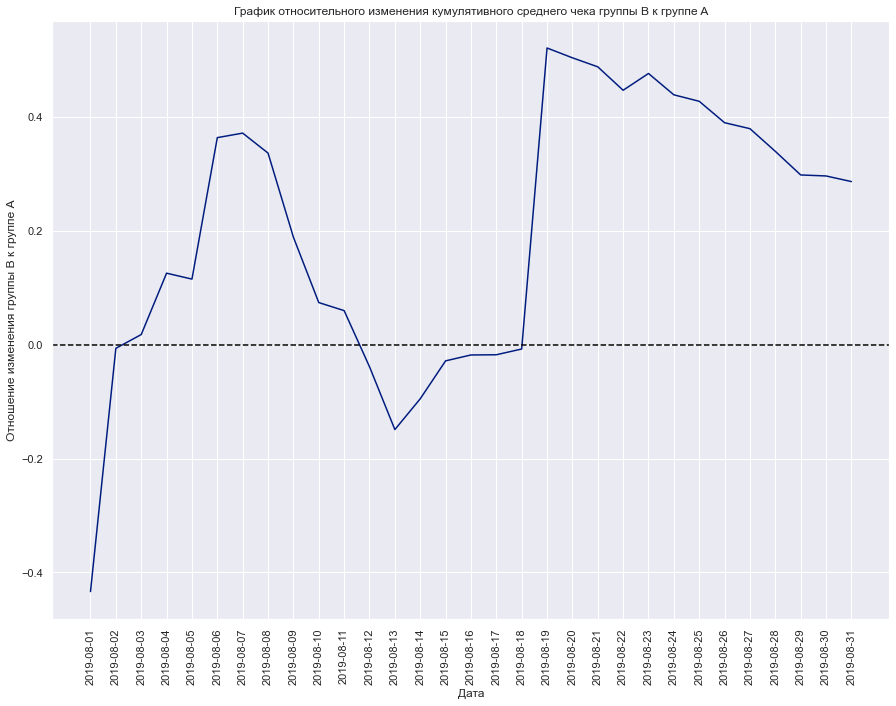

In [20]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Отношение изменения группы В к группе А')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xticks(rotation = 90) 
plt.show()

#### Вывод

Так же как и ранеее, крупный заказ исказил результаты, если смотреть до этого момента мы так же можем увидеть несколько резких изменений, а значит крупные заказы были сделаны в несколько дат

#### Построим график кумулятивной конверсии по группам. 

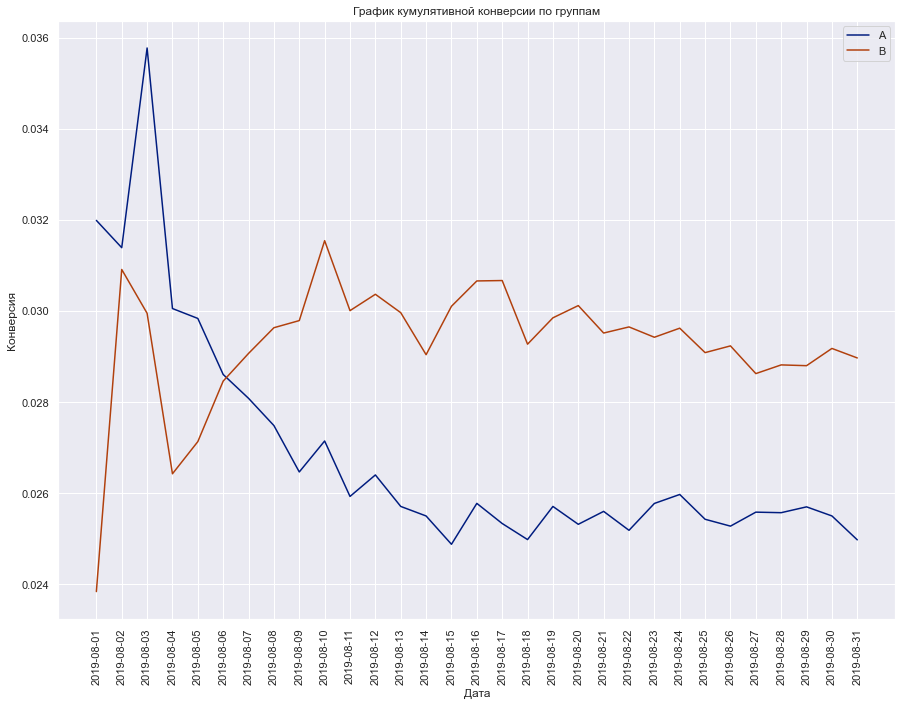

In [21]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.title('График кумулятивной конверсии по группам')
plt.xticks(rotation = 90) 
plt.show()

#### Вывод

В начале теста конверсия в группе А была выше, однако быстро начала падать и на 6 день уже сравнялась с группой В. При этом несмотря на то, что по группе В конверсия выше, в обоих группах можно заметить слабый нисходящий тренд, что свидетельствует о медленной уменьшении конверсии. 
Возможно скачки были вызваны рекламной компанией?

#### Построим график относительного изменения кумулятивной конверсии группы B к группе A

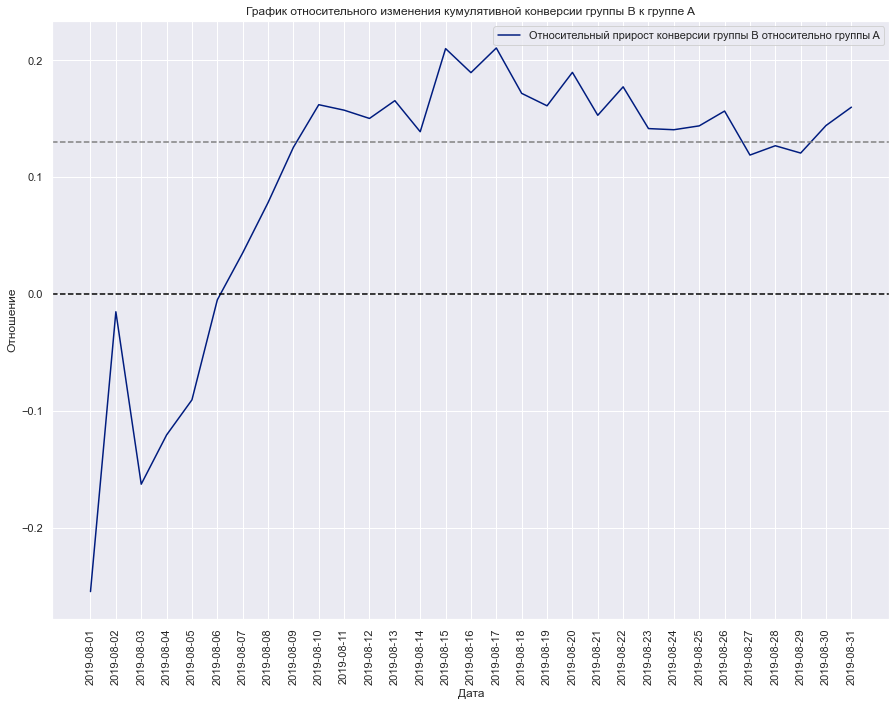

In [22]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Отношение')
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xticks(rotation = 90) 
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.13, color='grey', linestyle='--')
plt.show()

#### Вывод

График подверждает то, что в начале теста конверсия в группе А была выше, однако конверсия по группе В н на 6 день уже сравнялась с группой В и продолжила расти, пока не зафиксировалась на уровне выше 13% выше чем по группе А.

#### Построим точечный график количества заказов по пользователям

,userId,orders
908,3.967698e+09,3
55,2.498647e+08,3
478,2.108163e+09,3
687,2.988191e+09,3
890,3.908431e+09,3
138,6.110592e+08,3
632,2.742574e+09,3
157,6.783541e+08,2
323,1.404560e+09,2
452,1.985475e+09,2


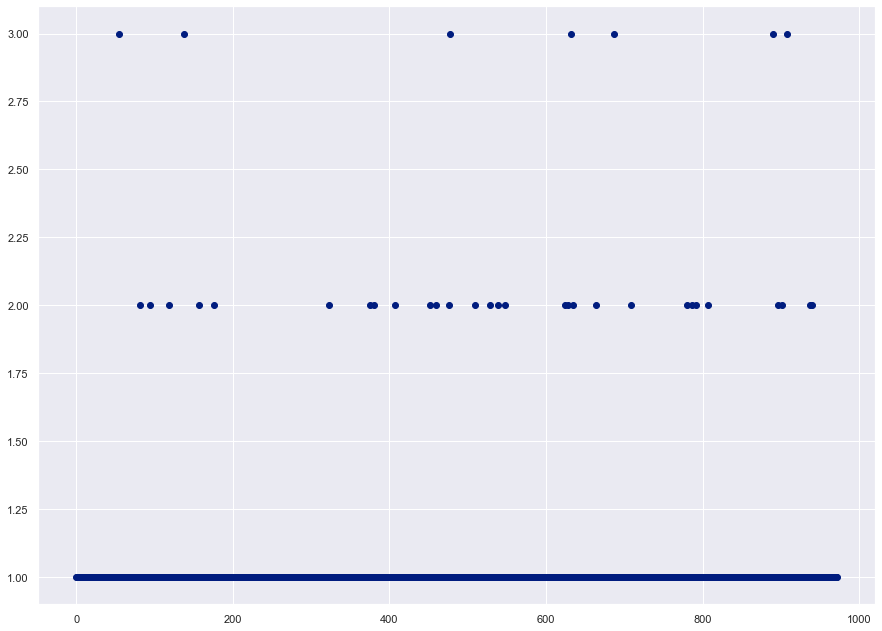

In [23]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']

display(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))


plt.scatter(x_values, ordersByUsers['orders']) 
plt.show()

#### Вывод

Пользователей которые совершили более 1 заказа немного, однако нужно точно сделать вывод, какой порог можно считать аномальным

#### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.


In [24]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


#### Вывод

Пользователей которые совершили более 2 заказов менее 1%, стоит признать число заказов более 2-х аномальными.

#### Построим точечный график стоимостей заказов.

,transactionId,visitorId,date,revenue,group
425,5.904709e+08,1.920143e+09,2019-08-19,1294500.0,B
1196,3.936777e+09,2.108081e+09,2019-08-15,202740.0,B
1136,6.666105e+08,1.307669e+09,2019-08-13,92550.0,A
744,3.668308e+09,8.885125e+08,2019-08-27,86620.0,B
743,3.603576e+09,4.133035e+09,2019-08-09,67990.0,A
1103,1.348774e+09,1.164614e+09,2019-08-12,66350.0,A
1099,3.169240e+08,1.484273e+08,2019-08-12,65710.0,A
949,1.347999e+09,8.879085e+08,2019-08-21,60450.0,A
940,2.420051e+09,4.003629e+09,2019-08-08,58550.0,B
131,3.163614e+09,2.254587e+09,2019-08-22,53904.0,A


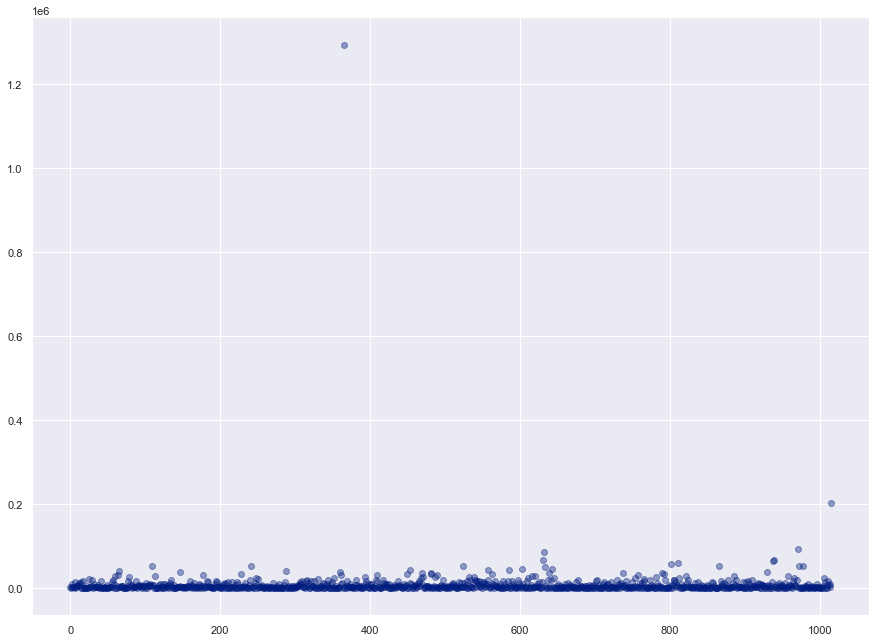

In [25]:
display(orders.sort_values(by='revenue', ascending=False).head(30))

x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'],alpha=0.4) 
plt.show()

#### Вывод

Из за аномально большого заказа в группе В, тяжело оценить по графику, что можно считать аномалиями. Прибегнем к процентилям 

#### Посчитаем 95-й и 99-й перцентили стоимости заказов







In [26]:
print(np.percentile(orders['revenue'], [95, 99])) 

[26785. 53904.]


#### Вывод

Мы можем сказать, что самый резкий выброс укладывается в 99 процетиль. Убрав 1% значений, мы уберем основные аномальные значения

#### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.

**Нулевая гипотеза:** Различий в конверсии между группами нет

alfa = 5%

In [27]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)



ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("P-value = {0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительный рост: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value = 0.01102
Относительный рост: 0.160


#### Вывод
По сырым данным можно сказать, что нулевую гипотезу мы отвергам. Т.е различия между группами статистически значимы. Конверсия выросла на 16%


#### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 

**Нулевая гипотеза:** Различий в cреднем чеке между группами нет

alfa = 5%

In [28]:
print('P-value = {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный рост: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

P-value = 0.829
Относительный рост: 0.287


#### Вывод
По сырым данным можно сказать, что у нас нет основании отвергать нулевую гипотезу. Т.е различия между группами незначительны


#### Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным.

**Нулевая гипотеза:** Различий в конверсии чеке между группами нет

alfa = 5%

In [29]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 99)]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 99)]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 99)]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormalUsers.head(5))
print('Число аномальных пользователей:', abnormalUsers.shape[0]) 

1099    148427295.0
33      249864742.0
58      611059232.0
949     887908475.0
744     888512513.0
dtype: float64

Число аномальных пользователей: 16


In [30]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [31]:
print('P-value = {0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

P-value = 0.00702
Относительный прирост: 0.189


#### Вывод
По очищенным данным можно сказать, что мы отвергаем нулевую гипотезу. Т.е различия между группами статистически значимы. Конверсия выросла на 18.9%


#### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

**Нулевая гипотеза:** Различий в конверсии чеке между группами нет

alfa = 5%

In [32]:
print(
    'P-value = {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительный прирост: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

P-value = 0.788
Относительный прирост: -0.032


#### Вывод
По очищенным данным можно сказать, что у нас нет основании отвергать нулевую гипотезу. Различия в среднем чеке по очищенным данным незначительны.


### Решение и общий вывод

Выручка увеличивается в течении всего теста. 
В группе В на 2019-08-18 произошел резкий рост выручки, что свидетельствует о том, что в эту группу попал крупный заказ, стоит удалить аномалии в дальнейшем.
Выручка по группе В  немного выше чем выручка по группе А.

2019-08-18 произошел резкий скачек среднего чека в группе B, что так же подтверждает попадание крупного заказа в эту группу. При этом мы можем видеть, что средний чек в группе A большую часть времени был стабилен, кроме начала теста, однако мы не можем сделать вывод по данной метрике из за крупного заказа

В начале теста конверсия в группе А была выше, однако быстро начала падать и на 6 день уже сравнялась с группой В. При этом несмотря на то, что по группе В конверсия выше, в обоих группах можно заметить слабый нисходящий тренд, что свидетельствует о медленной уменьшении конверсии. 

В начале теста конверсия в группе А была выше, однако конверсия по группе В на 6 день уже сравнялась с группой В и продолжила расти, пока не зафиксировалась на уровне выше 13% выше чем по группе А.

Пользователей которые совершили более 2 заказов менее 1%, стоит признать число заказов более 2-х аномальными.

Мы можем сказать, что самый резкий выброс по выручке укладывается в 99 процетиль. Убрав 1% значений, мы уберем основные аномальные значения

По результатам теста мы можем сделать следующий вывод.

После очистки аномальных значений мы можем сказать, что в группе В конверсия увеличилась, это подтверждает так же визуальные проверки, и тест по неочищенным данным.
При этом разницы в среднем чеке нет, это подверждают тесты как с аномальными значениями так и без них.
Рост конверсии составляет 18.9% по очищенным от аномалий данным.

Мы можем сказать, что в группе В больше конверсия, а средний чек не изменился. Пользователи группы В чаще совершают покупки, а значит изменение положительно. Тест можно остановить. 


## Чек лист

Часть 1. Приоритизация гипотез.
- [x] Открыть файл. Изучить датасет
  - [x] Спланировать дальнейшую обработку датасета:
- [x] Подготовить данные
  - [x] Проверить необходимость обработки данных в случае необходимости обработать их
- [x] Применить фреймворки для приоритизации гипотез
    - [x] Примените фреймворк ICE для приоритизации гипотез
    - [x] Примените фреймворк RICE для приоритизации гипотез.
    - [x] Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE.
Часть 2. Анализ A/B теста
- [x] Открыть файл. Изучить датасет
  - [x] Спланировать дальнейшую обработку датасета:
- [x] Подготовить данные
  - [x] Проверить необходимость обработки данных в случае необходимости обработать их
- [x] Проанализируйте A/B тест
    - [x] Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
    - [x] Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
    - [x] Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
    - [x] Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
    - [x] Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
    - [x] Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
    - [x] Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
    - [x] Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
    - [x] Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
    - [x] Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
    - [x] Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
    - [x] Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
    - [x] Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
    - [x] Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.
- [x] Есть общий вывод
- [x] Есть выводы к каждым шагам
